[Reference](https://medium.com/@ccpythonprogramming/making-your-matplotlib-charts-pop-and-look-amazing-e2c0f3ea9810)

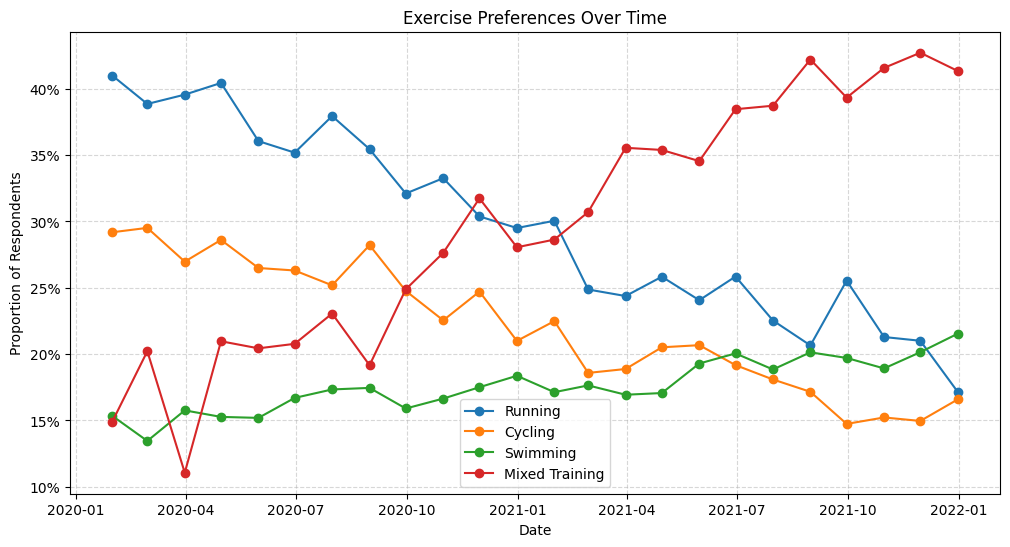

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Sample dataset
np.random.seed(42)
dates = pd.date_range(start="2020-01-01", periods=24, freq="ME")

data = {
    "Running": np.linspace(0.4, 0.2, num=24) + np.random.normal(0, 0.02, 24),
    "Cycling": np.linspace(0.3, 0.15, num=24) + np.random.normal(0, 0.015, 24),
    "Swimming": np.linspace(0.15, 0.2, num=24) + np.random.normal(0, 0.01, 24),
    "Mixed Training": np.linspace(0.15, 0.45, num=24) + np.random.normal(0, 0.025, 24),
}

for key in data:
    data[key] = np.clip(data[key], 0, 1)

df = pd.DataFrame(data, index=dates)

# Basic plot
fig, ax = plt.subplots(figsize=(12, 6))

for activity in df.columns:
    plt.plot(df.index, df[activity], marker="o", label=activity)

plt.title("Exercise Preferences Over Time")
plt.xlabel("Date")
plt.ylabel("Proportion of Respondents")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()

plt.show()

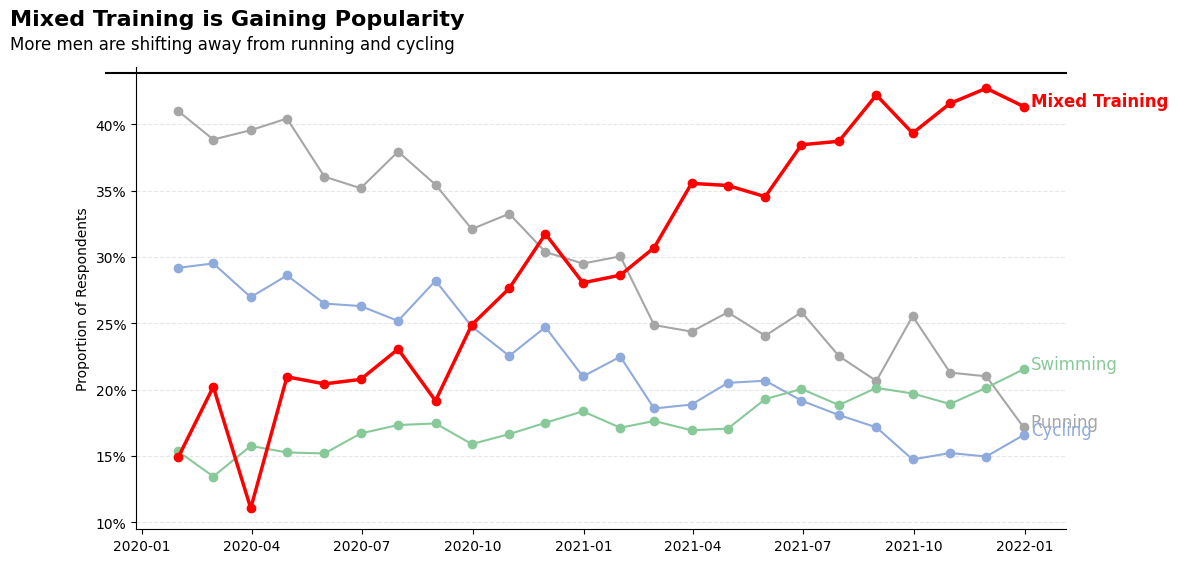

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Sample dataset
np.random.seed(42)
dates = pd.date_range(start="2020-01-01", periods=24, freq="ME")

data = {
    "Running": np.linspace(0.4, 0.2, num=24) + np.random.normal(0, 0.02, 24),
    "Cycling": np.linspace(0.3, 0.15, num=24) + np.random.normal(0, 0.015, 24),
    "Swimming": np.linspace(0.15, 0.2, num=24) + np.random.normal(0, 0.01, 24),
    "Mixed Training": np.linspace(0.15, 0.45, num=24) + np.random.normal(0, 0.025, 24),
}

for key in data:
    data[key] = np.clip(data[key], 0, 1)

df = pd.DataFrame(data, index=dates)

# Basic plot
fig, ax = plt.subplots(figsize=(12, 6))

colors = {
    "Running": "#a6a6a6",
    "Cycling": "#8faadc",
    "Swimming": "#88c999",
    "Mixed Training": "red"
}

for activity in df.columns:
    plt.plot(df.index, df[activity], marker="o", label=activity, color=colors[activity],
             linewidth=2.5 if activity == "Mixed Training" else 1.5)

# Titles
plt.text(0.02, 0.95, "Mixed Training is Gaining Popularity", fontsize=16, transform=fig.transFigure, fontweight="bold")
plt.text(0.02, 0.91, "More men are shifting away from running and cycling", fontsize=12, transform=fig.transFigure)

# Inline labels instead of a legend
for activity in df.columns:
    plt.annotate(activity, xy=(df.index[-1], df[activity].iloc[-1]), xytext=(5, 0), textcoords="offset points",
                 color=colors[activity], fontsize=12, fontweight="bold" if activity == "Mixed Training" else "normal")

# Reduce clutter
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# Separation line
plt.gca().plot([0.1, .9], [0.87, 0.87], transform=fig.transFigure, clip_on=False, color="black", linewidth=1.5)

plt.ylabel("Proportion of Respondents")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))

plt.show()

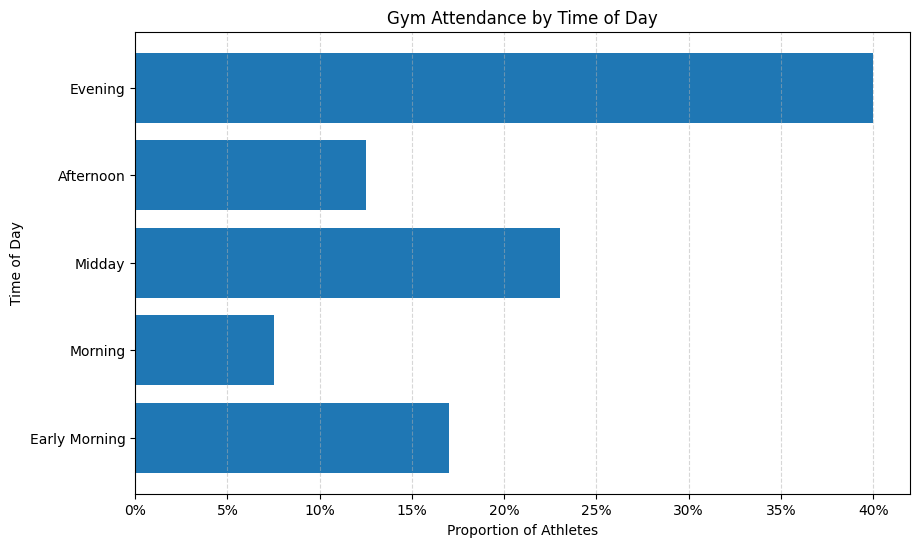

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Sample dataset
df_bar = pd.DataFrame({
    "Time": ["Early Morning", "Morning", "Midday", "Afternoon", "Evening"],
    "Athletes": [0.17, 0.075, 0.23, 0.125, 0.4]
})

# Basic Bar Chart
fig, ax = plt.subplots(figsize=(10, 6))
plt.barh(df_bar["Time"], df_bar["Athletes"])

# Labels and title
plt.xlabel("Proportion of Athletes")
plt.ylabel("Time of Day")
plt.title("Gym Attendance by Time of Day")

# Format x-axis as percentages
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))

# Grid lines
plt.grid(axis="x", linestyle="--", alpha=0.5)

# Show the chart
plt.show()

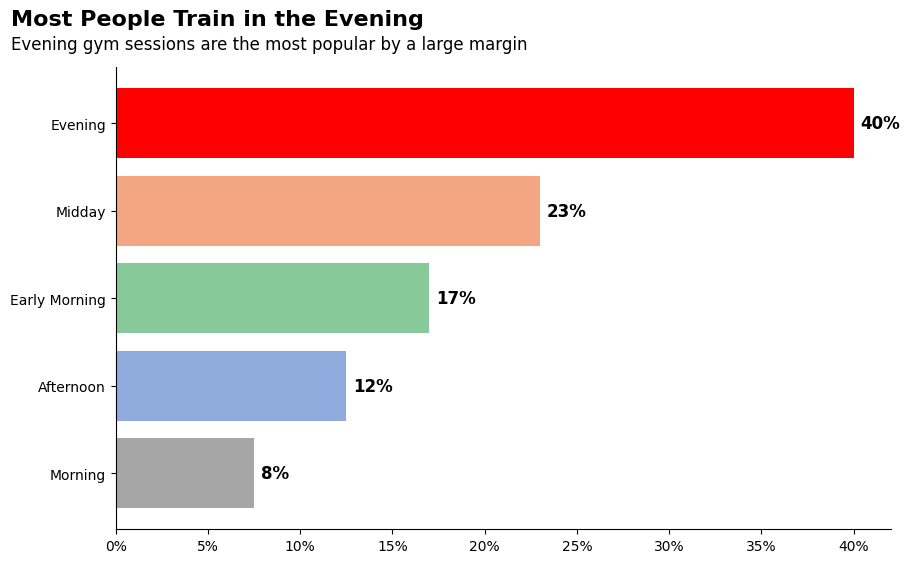

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Sample dataset
df_bar = pd.DataFrame({
    "Time": ["Early Morning", "Morning", "Midday", "Afternoon", "Evening"],
    "Athletes": [0.17, 0.075, 0.23, 0.125, 0.4]
}).sort_values("Athletes", ascending=True)  # Sort data for better visualization

# Define colors: muted but distinct for lesser values, red for emphasis
colors = ["#a6a6a6", "#8faadc", "#88c999", "#f4a582", "red"]

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars with unique colors
bars = plt.barh(df_bar["Time"], df_bar["Athletes"], color=colors)

# Add labels inside bars
plt.bar_label(bars, labels=[f"{x:.0%}" for x in df_bar["Athletes"]], padding=5, fontsize=12, fontweight="bold")

# Title and subtitle
plt.text(0.02, 0.95, "Most People Train in the Evening", fontsize=16, transform=fig.transFigure, fontweight="bold")
plt.text(0.02, 0.91, "Evening gym sessions are the most popular by a large margin", fontsize=12, transform=fig.transFigure)

# Remove unnecessary grid and spines
plt.grid(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# Format x-axis for percentage
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))

# Display the plot
plt.show()

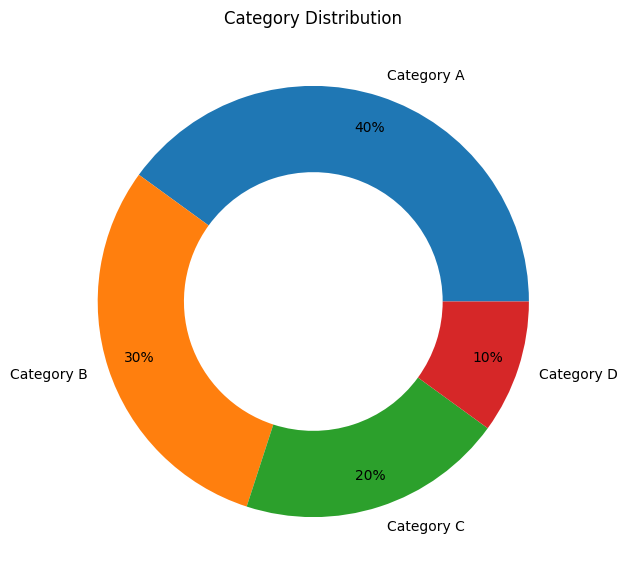

In [5]:
import matplotlib.pyplot as plt

# Sample dataset
sizes = [40, 30, 20, 10]
labels = ["Category A", "Category B", "Category C", "Category D"]

# Create Donut Chart with adjusted percentage position
fig, ax = plt.subplots(figsize=(7, 7))
plt.pie(
    sizes, labels=labels, autopct="%1.0f%%",
    wedgeprops=dict(width=0.4),
    pctdistance=0.85  # Moves percentage labels inside the wedges
)

# Title
plt.title("Category Distribution")

plt.show()

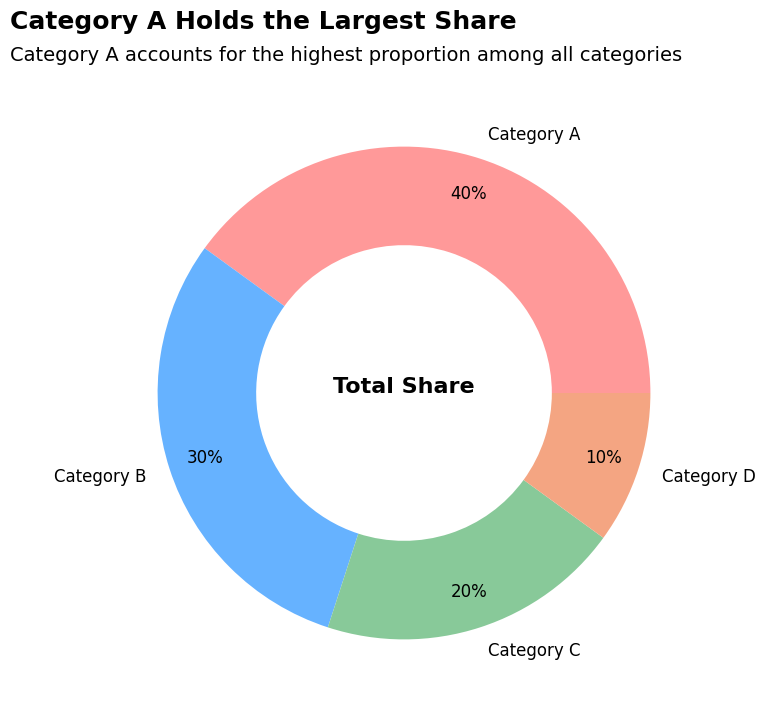

In [6]:
import matplotlib.pyplot as plt

# Sample dataset
sizes = [40, 30, 20, 10]
labels = ["Category A", "Category B", "Category C", "Category D"]
colors = ["#FF9999", "#66B2FF", "#88c999", "#f4a582"]  # Muted distinct colors

# Create Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    sizes, labels=labels, autopct="%1.0f%%", colors=colors,
    wedgeprops=dict(width=0.4), textprops={'fontsize': 12}, pctdistance=0.85
)

# Center Label
plt.text(0, 0, "Total Share", fontsize=16, ha="center", fontweight="bold")

# Title & Subtitle (Now Consistent with Basic Chart)
plt.text(0.02, 0.95, "Category A Holds the Largest Share", fontsize=18, transform=fig.transFigure, fontweight="bold")
plt.text(0.02, 0.91, "Category A accounts for the highest proportion among all categories", fontsize=14, transform=fig.transFigure)

# Display the chart
plt.show()

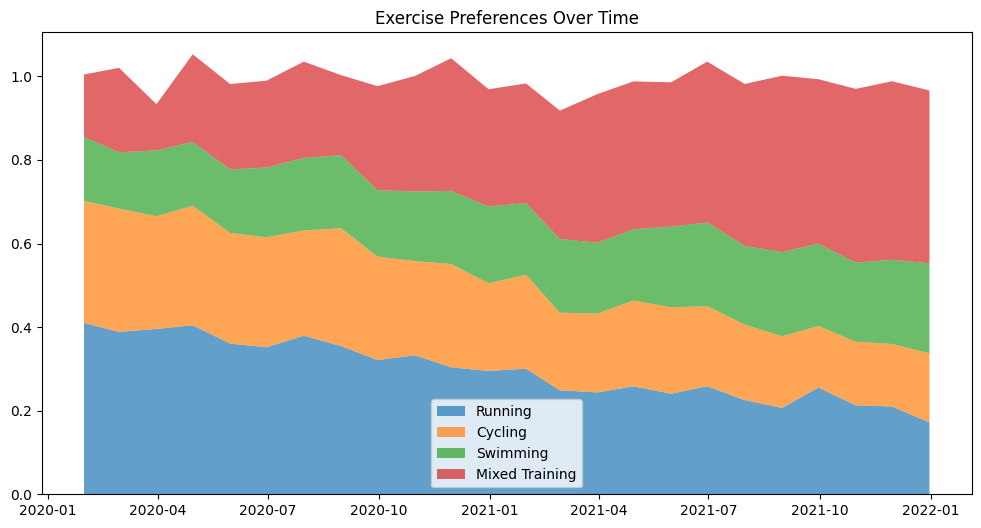

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample dataset
np.random.seed(42)
dates = pd.date_range(start="2020-01-01", periods=24, freq="ME")

data = {
    "Running": np.linspace(0.4, 0.2, num=24) + np.random.normal(0, 0.02, 24),
    "Cycling": np.linspace(0.3, 0.15, num=24) + np.random.normal(0, 0.015, 24),
    "Swimming": np.linspace(0.15, 0.2, num=24) + np.random.normal(0, 0.01, 24),
    "Mixed Training": np.linspace(0.15, 0.45, num=24) + np.random.normal(0, 0.025, 24),
}

df = pd.DataFrame(data, index=dates)

# Basic Stacked Area Chart
fig, ax = plt.subplots(figsize=(12, 6))
plt.stackplot(df.index, df.T, labels=df.columns, alpha=0.7)
plt.title("Exercise Preferences Over Time")
plt.legend()
plt.show()

<ipython-input-8-3e8c0ccaeaac>:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_position = df.iloc[-1].cumsum()[i]  # Align labels to the top of each stack


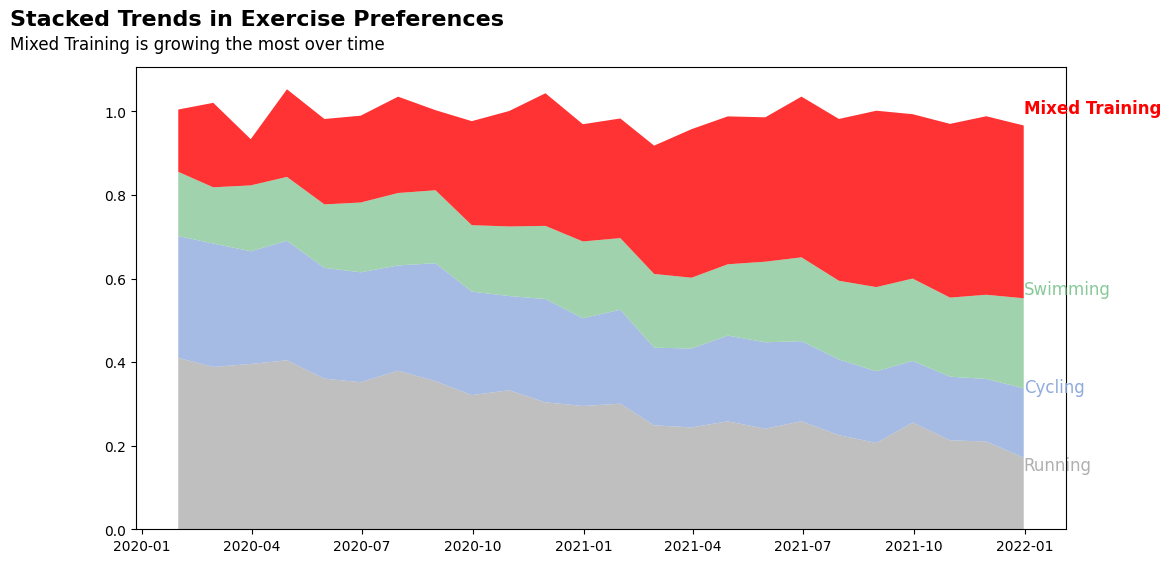

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample dataset
np.random.seed(42)
dates = pd.date_range(start="2020-01-01", periods=24, freq="ME")

data = {
    "Running": np.linspace(0.4, 0.2, num=24) + np.random.normal(0, 0.02, 24),
    "Cycling": np.linspace(0.3, 0.15, num=24) + np.random.normal(0, 0.015, 24),
    "Swimming": np.linspace(0.15, 0.2, num=24) + np.random.normal(0, 0.01, 24),
    "Mixed Training": np.linspace(0.15, 0.45, num=24) + np.random.normal(0, 0.025, 24),
}

df = pd.DataFrame(data, index=dates)

# Custom colors: Muted for lesser values, bold for primary finding
colors = ["#b0b0b0", "#8faadc", "#88c999", "red"]  # "Mixed Training" in bold red

# Create Stacked Area Chart
fig, ax = plt.subplots(figsize=(12, 6))
stacked = plt.stackplot(df.index, df.T, labels=df.columns, colors=colors, alpha=0.8)

# Title & Subtitle
plt.text(0.02, 0.95, "Stacked Trends in Exercise Preferences", fontsize=16, transform=fig.transFigure, fontweight="bold")
plt.text(0.02, 0.91, "Mixed Training is growing the most over time", fontsize=12, transform=fig.transFigure)

# Adjust Inline Labels for Each Stack
for i, (activity, color) in enumerate(zip(df.columns, colors)):
    y_position = df.iloc[-1].cumsum()[i]  # Align labels to the top of each stack

    # Apply custom offsets to prevent overlapping
    if activity == "Cycling":
        offset = -0.02  # Move cycling label slightly lower
    elif activity == "Running":
        offset = -0.04  # Move running label further down to avoid overlap
    elif activity == "Mixed Training":
        offset = 0.02  # Move Mixed Training slightly up to align with top
    else:
        offset = 0  # Default position

    plt.text(df.index[-1], y_position + offset, activity, fontsize=12, color=color, ha="left", va="bottom", fontweight="bold" if activity == "Mixed Training" else "normal")

# Remove unnecessary grid
plt.grid(False)

plt.show()